<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.828269,97.675712,28.612476,53.319509,-0.001683,243.434283,243.431008,0.003274
1,0.0,1.0,26.505350,72.775129,64.715117,21.789904,0.008049,195.793550,195.783765,0.009785
2,0.0,2.0,38.510866,20.517617,72.555865,50.355564,0.025967,191.965880,191.946886,0.018994
3,0.0,3.0,58.787577,41.176799,95.862169,28.579330,0.001619,234.407494,234.409916,-0.002422
4,0.0,4.0,41.790841,51.808352,70.999396,62.488652,-0.003512,237.083728,237.090014,-0.006286
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,85.046239,92.977769,47.873956,34.223977,-0.002964,270.118976,270.119817,-0.000840
19996,999.0,16.0,49.290735,21.336979,42.287864,62.291877,-0.004105,185.203349,185.205446,-0.002097
19997,999.0,17.0,95.177446,50.053854,22.267944,45.191064,-0.002023,222.688285,222.686679,0.001606
19998,999.0,18.0,33.155001,70.229599,34.973368,22.095492,-0.001745,170.451714,170.450244,0.001470


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.828269,97.675712,28.612476,53.319509,-0.001683,243.434283,243.431008,0.003274
1,0.0,1.0,26.505350,72.775129,64.715117,21.789904,0.008049,195.793550,195.783765,0.009785
2,0.0,2.0,38.510866,20.517617,72.555865,50.355564,0.025967,191.965880,191.946886,0.018994
3,0.0,3.0,58.787577,41.176799,95.862169,28.579330,0.001619,234.407494,234.409916,-0.002422
4,0.0,4.0,41.790841,51.808352,70.999396,62.488652,-0.003512,237.083728,237.090014,-0.006286
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,85.046239,92.977769,47.873956,34.223977,-0.002964,270.118976,270.119817,-0.000840
19996,999.0,16.0,49.290735,21.336979,42.287864,62.291877,-0.004105,185.203349,185.205446,-0.002097
19997,999.0,17.0,95.177446,50.053854,22.267944,45.191064,-0.002023,222.688285,222.686679,0.001606
19998,999.0,18.0,33.155001,70.229599,34.973368,22.095492,-0.001745,170.451714,170.450244,0.001470


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.828269  97.675712  28.612476  53.319509 -0.001683  243.434283   
      1.0    26.505350  72.775129  64.715117  21.789904  0.008049  195.793550   
      2.0    38.510866  20.517617  72.555865  50.355564  0.025967  191.965880   
      3.0    58.787577  41.176799  95.862169  28.579330  0.001619  234.407494   
      4.0    41.790841  51.808352  70.999396  62.488652 -0.003512  237.083728   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   85.046239  92.977769  47.873956  34.223977 -0.002964  270.118976   
      16.0   49.290735  21.336979  42.287864  62.291877 -0.004105  185.203349   
      17.0   95.177446  50.053854  22.267944  45.191064 -0.002023  222.688285   
      18.0   33.155001  70.229599  34.973368  22.095492 -0.001745  170.451714   
      19.0   54.453066  40.903471  57.526672  68.830798  0.008528  231.722535   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.431008  0.003274  
      1.0    195.783765  0.009785  
      2.0    191.946886  0.018994  
      3.0    234.409916 -0.002422  
      4.0    237.090014 -0.006286  
...                 ...       ...  
999.0 15.0   270.119817 -0.000840  
      16.0   185.205446 -0.002097  
      17.0   222.686679  0.001606  
      18.0   170.450244  0.001470  
      19.0   231.713492  0.009042  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.828269  97.675712  28.612476  53.319509 -0.001683  243.434283   
      1.0    26.505350  72.775129  64.715117  21.789904  0.008049  195.793550   
      2.0    38.510866  20.517617  72.555865  50.355564  0.025967  191.965880   
      3.0    58.787577  41.176799  95.862169  28.579330  0.001619  234.407494   
      4.0    41.790841  51.808352  70.999396  62.488652 -0.003512  237.083728   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   85.046239  92.977769  47.873956  34.223977 -0.002964  270.118976   
      16.0   49.290735  21.336979  42.287864  62.291877 -0.004105  185.203349   
      17.0   95.177446  50.053854  22.267944  45.191064 -0.002023  222.688285   
      18.0   33.155001  70.229599  34.973368  22.095492 -0.001745  170.451714   
      19.0   54.453066  40.903471  57.526672  68.830798  0.008528  231.722535   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.431008  0.003274  
      1.0    195.783765  0.009785  
      2.0    191.946886  0.018994  
      3.0    234.409916 -0.002422  
      4.0    237.090014 -0.006286  
...                 ...       ...  
999.0 15.0   270.119817 -0.000840  
      16.0   185.205446 -0.002097  
      17.0   222.686679  0.001606  
      18.0   170.450244  0.001470  
      19.0   231.713492  0.009042  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.828269,97.675712,28.612476,53.319509,-0.001683,243.434283,243.431008,0.003274
1,0.0,1.0,26.505350,72.775129,64.715117,21.789904,0.008049,195.793550,195.783765,0.009785
2,0.0,2.0,38.510866,20.517617,72.555865,50.355564,0.025967,191.965880,191.946886,0.018994
3,0.0,3.0,58.787577,41.176799,95.862169,28.579330,0.001619,234.407494,234.409916,-0.002422
4,0.0,4.0,41.790841,51.808352,70.999396,62.488652,-0.003512,237.083728,237.090014,-0.006286
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,85.046239,92.977769,47.873956,34.223977,-0.002964,270.118976,270.119817,-0.000840
19996,999.0,16.0,49.290735,21.336979,42.287864,62.291877,-0.004105,185.203349,185.205446,-0.002097
19997,999.0,17.0,95.177446,50.053854,22.267944,45.191064,-0.002023,222.688285,222.686679,0.001606
19998,999.0,18.0,33.155001,70.229599,34.973368,22.095492,-0.001745,170.451714,170.450244,0.001470


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.828269  97.675712  28.612476  53.319509 -0.001683  243.434283   
      1.0    26.505350  72.775129  64.715117  21.789904  0.008049  195.793550   
      2.0    38.510866  20.517617  72.555865  50.355564  0.025967  191.965880   
      3.0    58.787577  41.176799  95.862169  28.579330  0.001619  234.407494   
      4.0    41.790841  51.808352  70.999396  62.488652 -0.003512  237.083728   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   85.046239  92.977769  47.873956  34.223977 -0.002964  270.118976   
      16.0   49.290735  21.336979  42.287864  62.291877 -0.004105  185.203349   
      17.0   95.177446  50.053854  22.267944  45.191064 -0.002023  222.688285   
      18.0   33.155001  70.229599  34.973368  22.095492 -0.001745  170.451714   
      19.0   54.453066  40.903471  57.526672  68.830798  0.008528  231.722535   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.431008  0.003274  
      1.0    195.783765  0.009785  
      2.0    191.946886  0.018994  
      3.0    234.409916 -0.002422  
      4.0    237.090014 -0.006286  
...                 ...       ...  
999.0 15.0   270.119817 -0.000840  
      16.0   185.205446 -0.002097  
      17.0   222.686679  0.001606  
      18.0   170.450244  0.001470  
      19.0   231.713492  0.009042  

[20000 rows x 8 columns]

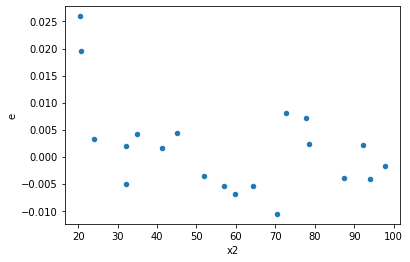

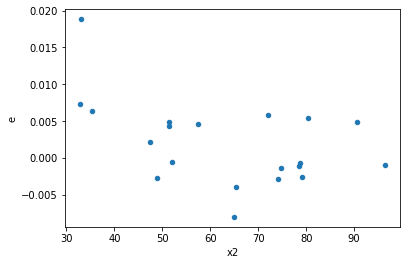

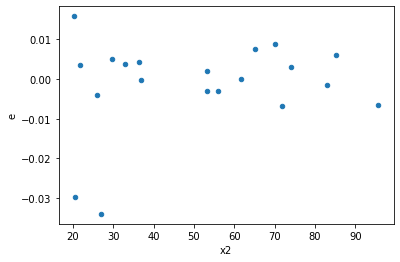

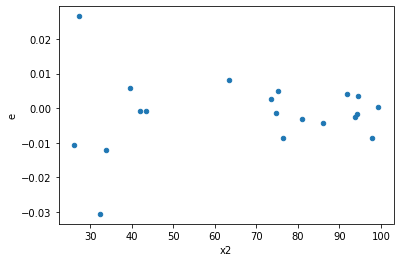

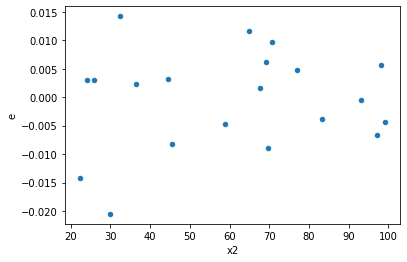

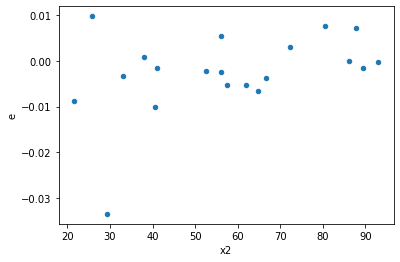

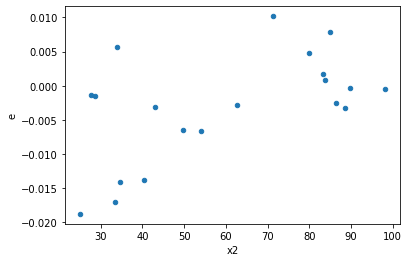

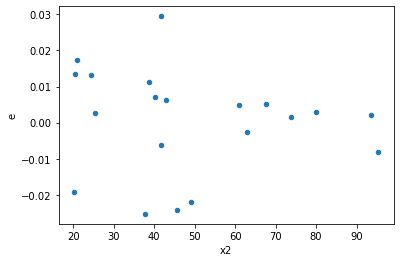

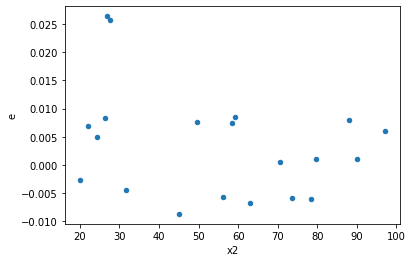

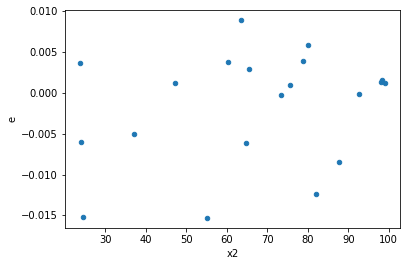

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,4.0,4.0,0.0001546989542896159,0.00043767728943134795,3.8674738572403976e-05,0.00010941932235783699,2.8292194439269513,0.33795452497686007,0.83102273751157,0.16897726248843004,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,8.43376658656932e-06,2.0553348292036753e-05,2.10844164664233e-06,5.138337073009188e-06,2.43703072418055,0.4093905855611353,0.7953047072194324,0.20469529278056764,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,0.00027081894185453597,0.000446315884027739,6.770473546363399e-05,0.00011157897100693475,1.6480231440659978,0.6402484558069581,0.679875772096521,0.32012422790347905,Reject001=1 : Homoscedasticity
14.0,4.0,4.0,0.00020338614260510753,0.0002572012502040859,5.084653565127688e-05,6.430031255102147e-05,1.2645957433956807,0.8255372794979081,0.5872313602510459,0.41276863974895406,Reject001=1 : Homoscedasticity
18.0,4.0,4.0,6.480929196644426e-05,0.00015182909851057456,1.6202322991611066e-05,3.795727462764364e-05,2.342705712464592,0.42988200484700245,0.7850589975764988,0.21494100242350123,Reject001=1 : Homoscedasticity
19.0,4.0,4.0,0.00018126201367742927,0.00018303847352769568,4.5315503419357316e-05,4.575961838192392e-05,1.0098005081937784,0.9926855199268738,0.5036572400365631,0.4963427599634369,Reject001=1 : Homoscedasticity
20.0,4.0,4.0,0.0004368304609757441,0.0010169808393664839,0.00010920761524393602,0.00025424520984162097,2.328090484108785,0.43319148701677124,0.7834042564916144,0.21659574350838562,Reject001=1 : Homoscedasticity
24.0,4.0,4.0,5.6184451830981046e-05,0.00016458107465171923,1.4046112957745261e-05,4.114526866292981e-05,2.929299286336838,0.32268152164799124,0.8386592391760044,0.16134076082399562,Reject001=1 : Homoscedasticity
25.0,4.0,4.0,8.86620452778107e-05,9.583200941438842e-05,2.2165511319452675e-05,2.3958002353597104e-05,1.0808684721191755,0.9417350778610984,0.5291324610694508,0.4708675389305492,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.0005716526505958364,0.00027413401874747004,0.0001429131626489591,6.853350468686751e-05,0.47954648414861506,0.49411520466782655,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,0.00013702535616354517,5.279607272929076e-06,3.425633904088629e-05,1.319901818232269e-06,0.03853014814738125,0.00805448130385299,Reject001=0 : Heteroscedasticity
2.0,4.0,4.0,0.0001546989542896159,0.00043767728943134795,3.8674738572403976e-05,0.00010941932235783699,2.8292194439269513,0.33795452497686007,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,0.0008853628288791663,1.2892077107952022e-05,0.00022134070721979156,3.2230192769880054e-06,0.014561348960485356,0.0012241155137552862,Reject001=0 : Heteroscedasticity
4.0,4.0,4.0,8.43376658656932e-06,2.0553348292036753e-05,2.10844164664233e-06,5.138337073009188e-06,2.43703072418055,0.4093905855611353,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,0.0009383351732912884,8.86227803686034e-05,0.0002345837933228221,2.215569509215085e-05,0.09444682762743685,0.04211179659977098,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,0.0002908791911598218,2.63702176565343e-05,7.271979778995546e-05,6.592554414133575e-06,0.09065694094991257,0.03915781187569431,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,0.00027081894185453597,0.000446315884027739,6.770473546363399e-05,0.00011157897100693475,1.6480231440659978,0.6402484558069581,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,0.0002548083949664779,9.732679672374635e-05,6.370209874161948e-05,2.433169918093659e-05,0.38196071497781886,0.3738943107011752,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      902
Reject001=0 : Heteroscedasticity     98
Name: Result_test, dtype: int64